In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-1e0017664fd4>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# Import the data 
ltc = pd.read_csv('../data/BC/ngan_merged_OSAtoCOVID.csv')
ltc.info()
ltc.columns.values
# for each in ltc.columns.values:
#     print(each)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Columns: 108 entries, FACILITY_NAME to outbreak
dtypes: float64(24), int64(7), object(77)
memory usage: 250.7+ KB


array(['FACILITY_NAME', 'HCC_CODE', 'HLTH_AUTH', 'OWNERSHIP',
       'STREET_ADDRESS', 'CITY', 'POSTAL', 'PHONE', 'OPERATOR_NAME',
       'OPEN_DATE', 'COUNCIL', 'MEETINGS_HELD', 'PARKING_COSTS',
       'REGULATION', 'ACCRED_STATUS', 'ACCRED_EXPIRY',
       'COMPLAINT_CONTACT', 'COMPLAINT_PHONE', 'SPENDING_ACCOUNT',
       'FOOD_SERVICE', 'FOOD_PREP', 'FOOD_COST_LASTYR',
       'FOOD_COST_CURRENTYR', 'LANGUAGES', 'DCH_NURSE_LASTYR',
       'DCH_ALLIED_LASTYR', 'DCH_TOTAL_LASTYR', 'DCH_NURSE_CURRENTYR',
       'DCH_ALLIED_CURRENTYR', 'DCH_TOTAL_CURRENTYR', 'FEES_CABLE',
       'FEES_TELE', 'FEES_INTERNET', 'FEES_OTHER', 'BEDS_PRIVATE',
       'BEDS_PUBLIC', 'BEDS_TOTAL', 'ROOMS_PRIVATE', 'ROOMS_SEMI',
       'ROOMS_MULTI', 'COMPLAINTS', 'SUB_COMPLAINTS', 'INCIDENT_OUTBREAK',
       'INCIDENT_ABUSE', 'INCIDENT_FALL', 'INCIDENT_POISON',
       'INCIDENT_MEDICATION', 'INCIDENT_WANDERING', 'INCIDENT_INJURY',
       'INCIDENT_AGGRESSION', 'INCIDENT_OUTBREAK_100',
       'INCIDENT_ABUSE_100',

In [3]:
# There are 5 homes where all ROOMS_* preditors == 0
temp = ltc.loc[ltc['ROOMS_PRIVATE'] == 0]
temp[['FACILITY_NAME', 'BEDS_PRIVATE', 'BEDS_TOTAL', 'ROOMS_PRIVATE', 'ROOMS_SEMI', 'ROOMS_MULTI']]

,FACILITY_NAME,BEDS_PRIVATE,BEDS_TOTAL,ROOMS_PRIVATE,ROOMS_SEMI,ROOMS_MULTI
26,Brookhaven Care Centre,0,84,0,0,0
66,Dufferin Care Centre,25,153,0,0,0
101,Glenmore Lodge,18,118,0,0,0
107,Haida Gwaii Hospital and Health Centre,0,8,0,2,2
123,Holyrood Manor,2,125,0,0,0
181,Nicola Lodge,18,230,0,0,0


# Impute where all ROOMS_* predictors == 0

The blank room counts are due to the self-reported nature of the data. In these cases, the facilities did not respond for our currently published Quick Facts Directory. They DID respond, however, to our recent targeted inquiries to resolve room count issues mentioned above.
    - Brookhaven Care Centre – 104 public beds, 96 single rooms, 4 double rooms
    - Dufferin Care Centre – 128 public beds, 25 private beds, 97 single rooms, 28 double rooms
    - Glenmore Lodge – 100 public beds, 18 private beds, 118 single rooms
    - Holyrood Manor – 124 public beds, 1 private bed, 77 single rooms, 24 double rooms
    - Nicola Lodge – 212 public beds, 18 private beds, 220 single rooms, 5 double rooms

In [4]:
# Impute
# Brookhaven Care Centre
ltc.at[26, 'BEDS_TOTAL'] = 104
ltc.at[26, 'ROOMS_PRIVATE'] = 97
ltc.at[26, 'ROOMS_SEMI'] = 28

# ltc.loc[ltc['FACILITY_NAME'] == 'Dufferin Care Centre'] #66
ltc.at[66, 'ROOMS_PRIVATE'] = 96
ltc.at[66, 'ROOMS_SEMI'] = 4

# ltc.loc[ltc['FACILITY_NAME'] == 'Glenmore Lodge'] #101
ltc.at[101, 'ROOMS_PRIVATE'] = 118

# ltc.loc[ltc['FACILITY_NAME'] == 'Holyrood Manor'] #123
ltc.at[123, 'BEDS_TOTAL'] = 125
ltc.at[123, 'BEDS_PRIVATE'] = 1
ltc.at[123, 'ROOMS_PRIVATE'] = 77
ltc.at[123, 'ROOMS_SEMI'] = 24

# ltc.loc[ltc['FACILITY_NAME'] == 'Nicola Lodge'] #181
ltc.at[181, 'ROOMS_PRIVATE'] = 220
ltc.at[181, 'ROOMS_SEMI'] = 5

In [5]:
ls = ['Brookhaven Care Centre',
    'Dufferin Care Centre',
    'Glenmore Lodge',
    'Holyrood Manor',
    'Nicola Lodge'
]

temp = ltc.loc[ltc['FACILITY_NAME'].isin(ls)]
temp[['FACILITY_NAME', 'BEDS_PRIVATE', 'BEDS_TOTAL', 'ROOMS_PRIVATE', 'ROOMS_SEMI', 'ROOMS_MULTI']]

,FACILITY_NAME,BEDS_PRIVATE,BEDS_TOTAL,ROOMS_PRIVATE,ROOMS_SEMI,ROOMS_MULTI
26,Brookhaven Care Centre,0,104,97,28,0
66,Dufferin Care Centre,25,153,96,4,0
101,Glenmore Lodge,18,118,118,0,0
123,Holyrood Manor,1,125,77,24,0
181,Nicola Lodge,18,230,220,5,0


In [6]:
# def missing(dff):
#     print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

# missing(ltc)


In [7]:
# Convert all suppressed values to NA
ltc = ltc.replace('suppressed', np.nan, regex=True)

# Convert NA values in the 'Total Confirmed Cases', 'Total Deaths' columns to 0s
ltc["Total Confirmed Cases"].fillna(0, inplace = True)
ltc["Total Deaths"].fillna(0, inplace = True)

# Special Unit homes

- The British Columbia Long-Term Care Quick Facts Directory contains information on 294 Long-term care facilities
- Three facilities have special care units identified in the Directory with a separate data. These are not normally counted as separate facilities.
    - Berkley Care Centre - Special Unit	
    - Fair Haven - Vancouver - Special Unit	
    - Harmony Court Care Centre - Special Unit
- Special Units **do not** have complaints, incident or inspections/infractions data
- Special Units **do** have different values for **HCC_CODE, open_date, DCH, number of beds and demographic data**
- Special care units are not counted separately in overall facility counts, they are counted separately for this direct care hours analysis.

    
### Possible Actions
1. Remove 3 Special Units
2. **Merge Special Unit Homes with their parent home**
    - Weighted average (by number of beds) of:
        - DCH
        - Case mix 
            - Age, Female, AGE_85_PLUS, AGE_UNDER_65, STAY_LENGTH
            - DEPRESSION, ADL_DEPENDENT, CPS_SEVERE, DEMENTIA, ABS_PHYS_ABUSIVE
            - ISE, ISE_LOW, CMI, THERAPY_PT, THERAPY_RT, THERAPY_OT
        - Quality 
            - MEDS_DEPRESSION, MEDS_ANTIPSYCHOTICS, RESTRAINTS
    - Sum number beds/rooms
        - 'BEDS_TOTAL', 'ROOMS_PRIVATE', 'ROOMS_SEMI', 'ROOMS_MULTI'
        - 'BEDS_PRIVATE', 'BEDS_PUBLIC', 'Total Confirmed Cases', 'Total Deaths'
    - Keep complaints, incident and inspections/infractions etc. data from parent home

In [8]:
ltc[ltc.FACILITY_NAME.str.contains("Special Unit", na=False)]

,FACILITY_NAME,HCC_CODE,HLTH_AUTH,OWNERSHIP,STREET_ADDRESS,CITY,POSTAL,PHONE,OPERATOR_NAME,OPEN_DATE,COUNCIL,MEETINGS_HELD,PARKING_COSTS,REGULATION,ACCRED_STATUS,ACCRED_EXPIRY,COMPLAINT_CONTACT,COMPLAINT_PHONE,SPENDING_ACCOUNT,FOOD_SERVICE,FOOD_PREP,FOOD_COST_LASTYR,FOOD_COST_CURRENTYR,LANGUAGES,DCH_NURSE_LASTYR,DCH_ALLIED_LASTYR,DCH_TOTAL_LASTYR,DCH_NURSE_CURRENTYR,DCH_ALLIED_CURRENTYR,DCH_TOTAL_CURRENTYR,FEES_CABLE,FEES_TELE,FEES_INTERNET,FEES_OTHER,BEDS_PRIVATE,BEDS_PUBLIC,BEDS_TOTAL,ROOMS_PRIVATE,ROOMS_SEMI,ROOMS_MULTI,COMPLAINTS,SUB_COMPLAINTS,INCIDENT_OUTBREAK,INCIDENT_ABUSE,INCIDENT_FALL,INCIDENT_POISON,INCIDENT_MEDICATION,INCIDENT_WANDERING,INCIDENT_INJURY,INCIDENT_AGGRESSION,INCIDENT_OUTBREAK_100,INCIDENT_ABUSE_100,INCIDENT_FALL_100,INCIDENT_POISON_100,INCIDENT_MEDICATION_100,INCIDENT_WANDERING_100,INCIDENT_INJURY_100,INCIDENT_AGGRESSION_100,ADVERSE_EVENT,AGE,FEMALE,AGE_85_PLUS,AGE_UNDER_65,STAY_LENGTH,DEPRESSION,ADL_DEPENDENT,CPS_SEVERE,DEMENTIA,ABS_PHYS_ABUSIVE,ISE,ISE_LOW,CMI,THERAPY_PT,THERAPY_RT,THERAPY_OT,MEDS_DEPRESSION,MEDS_ANTIPSYCHOTICS,RESTRAINTS,WEBPAGE,SURVEY_URL,MISSING_SURVEY,CONTRACTED_NURSING,CONTRACTED_CARE_AIDES,CONTRACTED_HOUSEKEEPING,CONTRACTED_PLANT,PER_DIEM_LASTYR,PER_DIEM_CURRENTYR,INSPECTIONS,INFRACTIONS,INFRACTIONS_LICENSING,INFRACTIONS_FACILITY,INFRACTIONS_STAFFING,INFRACTIONS_POLICY,INFRACTIONS_CARE,INFRACTIONS_DISEASE,INFRACTIONS_FOOD,INFRACTIONS_MEDICATION,INFRACTIONS_PROGRAM,INFRACTIONS_REPORTING,INFRACTIONS_RIGHTS,INFRACTIONS_OTHER,latitude,longitude,cleaned_name,Facility Name,Total Confirmed Cases,Total Deaths,outbreak
16,Berkley Care Centre - Special Unit,93A60,Vancouver Coastal Health,HA,2444 Burr Place,North Vancouver,V7H3A5,(604) 924-8300,Vancouver Coastal Health,1998,"Resident Council, Family Council",Regular Schedule,Yes (no fee),Community Care & Assisted Living Act,Accredited,September 2020,Manager,(604) 924-8356,Yes,Operator,Yes,$7.95,$8.11,"English, Tagalog, Spanish, Korean, Cantonese, Mandarin, Greek, Romanian, Khmer, Gujarati, Slovene, Hindi, Punjabi, Serbian, Bengali, Polish, Russian, Italian",3.26,0.24,3.50,3.26,0.24,3.50,No,No,No,Clothing labelling fee,0,12,12,12,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not applicable,78,39.7%,13.8%,13.8%,317,30.0%,18.0%,70.0%,86.0%,32.0%,1.5,70.0%,0.53,0.0%,50.0%,0.0%,84.0%,71.3%,21.7%,http://www.vch.ca/locations-services/result?res_id=36,https://surveybcseniors.org/carehomeresults/kiwanis-care-centre-vcha/,NaN,No,No,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.141596,-122.905427,berkley care centre - special unit,NaN,0.0,0.0,0
82,Fair Haven - Vancouver - Special Unit,93860,Vancouver Coastal Health,PNP,2720 East 48th Ave.,Vancouver,V5S1G7,(604) 433-2939,Fair Haven United Church Homes Society,1979,"Resident Council, Family Council",Regular Schedule,Yes (no fee),Community Care & Assisted Living Act,Accredited,November 2022,Clinical Nurse Manager,(604) 433-2939x2232 or x2222,Yes,Operator,Yes,$7.60,$8.08,NaN,3.95,0.23,4.18,3.95,0.23,4.18,No,No,No,"Clothing labelling fee, specialized wheelchairs, hairdressing",0,19,19,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not applicable,80,27.5%,29.7%,1.4%,273,7.8%,19.5%,66.2%,85.7%,19.5%,2.0,58.4%,0.54,1.3%,59.7%,0.0%,76.6%,75.4%,9.1%,http://www.fairhaven.bc.ca/care/,https://surveybcseniors.org/carehomeresults/the-fair-haven-united-church-home-vancouver-vcha/,NaN,No,No,No,No,$281.61,$272.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.225452,-123.036584,fair haven - vancouver - special unit,NaN,0.0,0.0,0
110,Harmony Court Care Centre - Special Unit,93A2A,Fraser Health,PFP,7195 Canada Way,Burnaby,V5E3R7,(604) 527-3300,Age Care Investment Ltd.,2011,Family Council,Regular Schedule,Yes (no fee),Community Care & Assisted Living Act,Unknown,not available,General Manager / Director of Care,(604) 527-3300,Yes,Outside Contractor,Yes,$3.92,$5.21,"English, French, Thai, Greek, Cantonese, Persian, Manda

In [9]:
# Convert variables to numeric type
ls = [
      'AGE', 'FEMALE', 'AGE_85_PLUS', 'AGE_UNDER_65', 'STAY_LENGTH',
      'DEPRESSION', 'ADL_DEPENDENT', 'CPS_SEVERE', 'DEMENTIA',
      'ABS_PHYS_ABUSIVE', 'ISE', 'ISE_LOW', 'CMI', 'THERAPY_PT',
      'THERAPY_RT', 'THERAPY_OT', 'MEDS_DEPRESSION',
      'MEDS_ANTIPSYCHOTICS', 'RESTRAINTS',
   'COMPLAINTS', 'SUB_COMPLAINTS', 'INCIDENT_OUTBREAK',
   'INCIDENT_ABUSE', 'INCIDENT_FALL', 'INCIDENT_POISON',
   'INCIDENT_MEDICATION', 'INCIDENT_WANDERING', 'INCIDENT_INJURY',
   'INCIDENT_AGGRESSION', 'INCIDENT_OUTBREAK_100',
   'INCIDENT_ABUSE_100', 'INCIDENT_FALL_100', 'INCIDENT_POISON_100',
   'INCIDENT_MEDICATION_100', 'INCIDENT_WANDERING_100',
   'INCIDENT_INJURY_100', 'INCIDENT_AGGRESSION_100', 'ADVERSE_EVENT'
]

for each in ls:
    ltc[each] = ltc[each].astype(str).str.rstrip('%')
    ltc[each] = pd.to_numeric(ltc[each], errors='coerce')


In [10]:
ltc[ltc['FACILITY_NAME'].str.contains('Fair Haven', regex=False, na=False)]

,FACILITY_NAME,HCC_CODE,HLTH_AUTH,OWNERSHIP,STREET_ADDRESS,CITY,POSTAL,PHONE,OPERATOR_NAME,OPEN_DATE,COUNCIL,MEETINGS_HELD,PARKING_COSTS,REGULATION,ACCRED_STATUS,ACCRED_EXPIRY,COMPLAINT_CONTACT,COMPLAINT_PHONE,SPENDING_ACCOUNT,FOOD_SERVICE,FOOD_PREP,FOOD_COST_LASTYR,FOOD_COST_CURRENTYR,LANGUAGES,DCH_NURSE_LASTYR,DCH_ALLIED_LASTYR,DCH_TOTAL_LASTYR,DCH_NURSE_CURRENTYR,DCH_ALLIED_CURRENTYR,DCH_TOTAL_CURRENTYR,FEES_CABLE,FEES_TELE,FEES_INTERNET,FEES_OTHER,BEDS_PRIVATE,BEDS_PUBLIC,BEDS_TOTAL,ROOMS_PRIVATE,ROOMS_SEMI,ROOMS_MULTI,COMPLAINTS,SUB_COMPLAINTS,INCIDENT_OUTBREAK,INCIDENT_ABUSE,INCIDENT_FALL,INCIDENT_POISON,INCIDENT_MEDICATION,INCIDENT_WANDERING,INCIDENT_INJURY,INCIDENT_AGGRESSION,INCIDENT_OUTBREAK_100,INCIDENT_ABUSE_100,INCIDENT_FALL_100,INCIDENT_POISON_100,INCIDENT_MEDICATION_100,INCIDENT_WANDERING_100,INCIDENT_INJURY_100,INCIDENT_AGGRESSION_100,ADVERSE_EVENT,AGE,FEMALE,AGE_85_PLUS,AGE_UNDER_65,STAY_LENGTH,DEPRESSION,ADL_DEPENDENT,CPS_SEVERE,DEMENTIA,ABS_PHYS_ABUSIVE,ISE,ISE_LOW,CMI,THERAPY_PT,THERAPY_RT,THERAPY_OT,MEDS_DEPRESSION,MEDS_ANTIPSYCHOTICS,RESTRAINTS,WEBPAGE,SURVEY_URL,MISSING_SURVEY,CONTRACTED_NURSING,CONTRACTED_CARE_AIDES,CONTRACTED_HOUSEKEEPING,CONTRACTED_PLANT,PER_DIEM_LASTYR,PER_DIEM_CURRENTYR,INSPECTIONS,INFRACTIONS,INFRACTIONS_LICENSING,INFRACTIONS_FACILITY,INFRACTIONS_STAFFING,INFRACTIONS_POLICY,INFRACTIONS_CARE,INFRACTIONS_DISEASE,INFRACTIONS_FOOD,INFRACTIONS_MEDICATION,INFRACTIONS_PROGRAM,INFRACTIONS_REPORTING,INFRACTIONS_RIGHTS,INFRACTIONS_OTHER,latitude,longitude,cleaned_name,Facility Name,Total Confirmed Cases,Total Deaths,outbreak
80,Fair Haven - Burnaby,99C49,Fraser Health,PNP,7557 Sussex Ave.,Burnaby,V5J3V6,(604) 435-0525,Fair Haven Homes Society,1994,"Resident Council, Family Council",Regular Schedule,Yes (fee charged),Community Care & Assisted Living Act,Accredited,November 2022,Nurse Manager,(604) 435-0525x304 or x320,Yes,Operator,Yes,$7.48,$7.53,NaN,2.67,0.33,3.00,2.74,0.34,3.08,No,No,No,"Clothing labelling fee, specialized wheelchairs, hairdressing",0,100,100,100,0,0,2.0,1.0,1.0,5.0,12.0,0.0,0.0,0.0,2.0,6.0,1.0,5.0,12.0,0.0,0.0,0.0,2.0,6.0,NaN,87.0,66.8,63.7,0.8,NaN,16.7,43.8,48.7,57.8,11.4,2.2,58.5,0.57,9.2,84.3,0.0,36.6,25.4,12.6,http://www.fairhaven.bc.ca/care/,https://surveybcseniors.org/carehomeresults/the-fair-haven-united-church-home-burnaby-fha/,NaN,No,No,No,No,$197.98,$205.01,3.0,5.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,49.215270,-123.005906,fair haven - burnaby,NaN,0.0,0.0,0
81,Fair Haven - Vancouver,999HG,Vancouver Coastal Health,PNP,2720 East 48th Ave.,Vancouver,V5S1G7,(604) 433-2939,Fair Haven United Church Homes Society,1979,"Resident Council, Family Council",Regular Schedule,Yes (no fee),Community Care & Assisted Living Act,Accredited,November 2022,Clinical Nurse Manager,(604) 433-2939x2232 or x2222,Yes,Operator,Yes,$7.70,$7.98,NaN,2.70,0.23,2.93,2.85,0.23,3.08,No,No,No,"Clothing labelling fee, specialized wheelchairs, hairdressing",0,82,82,70,6,0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,2.4,1.2,0.0,NaN,84.0,65.8,54.8,2.6,NaN,19.2,43.3,32.9,71.6,11.3,2.9,45.4,0.59,9.8,67.7,3.7,45.7,25.8,14.1,http://www.fairhaven.bc.ca/care/,https://surveybcseniors.org/carehomeresults/the-fair-haven-united-church-home-vancouver-vcha/,NaN,No,No,No,No,$199.74,$213.24,3.0,8.0,0.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.225452,-123.036584,fair haven - vancouver,NaN,0.0,0.0,0
82,Fair Haven - Vancouver - Special Unit,93860,Vancouver Coastal Health,PNP,2720 East 48th Ave.,Vancouver,V5S1G7,(604) 433-2939,Fair Haven United Church Homes Society,1979,"Resident Council, Family Council",Regular Schedule,Yes (no fee),Community Care & Assisted Living Act,Accredited,November 2022,Clinical Nurse Manager,(604) 433-2939x2232 or x2222,Yes,Operator,Yes,$7.60,$8.08,NaN,3.95,0.23,4.18,3.95,0.23,4.18,No,No,No,"Clothing labelling fee, specialized wheelchairs, hairdressing",0,19,19,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,27.5,29.7,1.4

In [11]:
# Add rows with new homes that have been merged with special units
# Duplicate the row
ltc.loc[297] = ltc.iloc[109] # For Harmony Court
ltc.loc[298] = ltc.iloc[15] # For Berkley
ltc.loc[299] = ltc.iloc[81] # For Fair Haven - Vancouver

# Adjust values in the new row
# Sum beds/room values from the original rows
ls = ['BEDS_TOTAL', 'ROOMS_PRIVATE', 'ROOMS_SEMI', 'ROOMS_MULTI',
      'BEDS_PRIVATE', 'BEDS_PUBLIC', 'Total Confirmed Cases', 'Total Deaths']

for each in ls:
    ltc.loc[297, each] = ltc.iloc[109][each] + ltc.iloc[110][each]
    ltc.loc[298, each] = ltc.iloc[15][each] + ltc.iloc[16][each]
    ltc.loc[299, each] = ltc.iloc[81][each] + ltc.iloc[82][each]


# Compute a weighted average for the DCH and demographic predictors    
ls = ['DCH_NURSE_LASTYR', 'DCH_ALLIED_LASTYR', 'DCH_TOTAL_LASTYR', 
      'DCH_NURSE_CURRENTYR', 'DCH_ALLIED_CURRENTYR', 'DCH_TOTAL_CURRENTYR', 
      'AGE', 'FEMALE', 'AGE_85_PLUS', 'AGE_UNDER_65', 'STAY_LENGTH',
      'DEPRESSION', 'ADL_DEPENDENT', 'CPS_SEVERE', 'DEMENTIA',
      'ABS_PHYS_ABUSIVE', 'ISE', 'ISE_LOW', 'CMI', 'THERAPY_PT',
      'THERAPY_RT', 'THERAPY_OT', 'MEDS_DEPRESSION',
      'MEDS_ANTIPSYCHOTICS', 'RESTRAINTS']    

for each in ls:
    ltc.loc[297, each] = ltc.iloc[109][each]*ltc.iloc[109]['BEDS_TOTAL']/ltc.iloc[297]['BEDS_TOTAL'] + ltc.iloc[110][each]*ltc.iloc[110]['BEDS_TOTAL']/ltc.iloc[297]['BEDS_TOTAL']
    ltc.loc[298, each] = ltc.iloc[15][each]*ltc.iloc[15]['BEDS_TOTAL']/ltc.iloc[298]['BEDS_TOTAL'] + ltc.iloc[16][each]*ltc.iloc[16]['BEDS_TOTAL']/ltc.iloc[298]['BEDS_TOTAL']
    ltc.loc[299, each] = ltc.iloc[81][each]*ltc.iloc[81]['BEDS_TOTAL']/ltc.iloc[299]['BEDS_TOTAL'] + ltc.iloc[82][each]*ltc.iloc[82]['BEDS_TOTAL']/ltc.iloc[299]['BEDS_TOTAL']
    
# Drop the original rows pre-merge
ltc = ltc.drop([ltc.index[109] , ltc.index[110], 
                        ltc.index[15] , ltc.index[16],
                        ltc.index[81], ltc.index[82]])

ltc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 299
Columns: 108 entries, FACILITY_NAME to outbreak
dtypes: float64(62), int64(7), object(39)
memory usage: 250.4+ KB


In [12]:
ltc[ltc['FACILITY_NAME'].str.contains('Special Unit', regex=False, na=False)]
ltc[ltc['FACILITY_NAME'].str.contains('Cariboo', regex=False, na=False)]

,FACILITY_NAME,HCC_CODE,HLTH_AUTH,OWNERSHIP,STREET_ADDRESS,CITY,POSTAL,PHONE,OPERATOR_NAME,OPEN_DATE,COUNCIL,MEETINGS_HELD,PARKING_COSTS,REGULATION,ACCRED_STATUS,ACCRED_EXPIRY,COMPLAINT_CONTACT,COMPLAINT_PHONE,SPENDING_ACCOUNT,FOOD_SERVICE,FOOD_PREP,FOOD_COST_LASTYR,FOOD_COST_CURRENTYR,LANGUAGES,DCH_NURSE_LASTYR,DCH_ALLIED_LASTYR,DCH_TOTAL_LASTYR,DCH_NURSE_CURRENTYR,DCH_ALLIED_CURRENTYR,DCH_TOTAL_CURRENTYR,FEES_CABLE,FEES_TELE,FEES_INTERNET,FEES_OTHER,BEDS_PRIVATE,BEDS_PUBLIC,BEDS_TOTAL,ROOMS_PRIVATE,ROOMS_SEMI,ROOMS_MULTI,COMPLAINTS,SUB_COMPLAINTS,INCIDENT_OUTBREAK,INCIDENT_ABUSE,INCIDENT_FALL,INCIDENT_POISON,INCIDENT_MEDICATION,INCIDENT_WANDERING,INCIDENT_INJURY,INCIDENT_AGGRESSION,INCIDENT_OUTBREAK_100,INCIDENT_ABUSE_100,INCIDENT_FALL_100,INCIDENT_POISON_100,INCIDENT_MEDICATION_100,INCIDENT_WANDERING_100,INCIDENT_INJURY_100,INCIDENT_AGGRESSION_100,ADVERSE_EVENT,AGE,FEMALE,AGE_85_PLUS,AGE_UNDER_65,STAY_LENGTH,DEPRESSION,ADL_DEPENDENT,CPS_SEVERE,DEMENTIA,ABS_PHYS_ABUSIVE,ISE,ISE_LOW,CMI,THERAPY_PT,THERAPY_RT,THERAPY_OT,MEDS_DEPRESSION,MEDS_ANTIPSYCHOTICS,RESTRAINTS,WEBPAGE,SURVEY_URL,MISSING_SURVEY,CONTRACTED_NURSING,CONTRACTED_CARE_AIDES,CONTRACTED_HOUSEKEEPING,CONTRACTED_PLANT,PER_DIEM_LASTYR,PER_DIEM_CURRENTYR,INSPECTIONS,INFRACTIONS,INFRACTIONS_LICENSING,INFRACTIONS_FACILITY,INFRACTIONS_STAFFING,INFRACTIONS_POLICY,INFRACTIONS_CARE,INFRACTIONS_DISEASE,INFRACTIONS_FOOD,INFRACTIONS_MEDICATION,INFRACTIONS_PROGRAM,INFRACTIONS_REPORTING,INFRACTIONS_RIGHTS,INFRACTIONS_OTHER,latitude,longitude,cleaned_name,Facility Name,Total Confirmed Cases,Total Deaths,outbreak
33,Cariboo Place,93GGE,Interior Health,PFP,185 Fourth Ave N,Williams Lake,V2G2C8,(778) 417-0275,Vantage Living Inc,2019,Resident & Family Council (combined),Regular Schedule,Yes (no fee),Community Care & Assisted Living Act,Accredited,January 2021,Raj Salaria,778-417-0275 ext 142,Yes,Operator,Yes,NaN,NaN,"English, Hindi, Punjabi, Mandarin",NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,"Equipment for exclusive use of the client, specialized equipment, foot care, hair dressing",2,70,72,72,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://vantageliving.ca/community/cariboo-place/,NaN,This facility did not exist yet when the Residential Care Survey was conducted.,No,No,No,Yes,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.131128,-122.141753,cariboo place,NaN,0.0,0.0,0


In [13]:
len(ltc)
# 248 homes have 0 multi-rooms
# ltc['ROOMS_MULTI'].value_counts()

# 128 homes have 0 semi-rooms
# ltc['ROOMS_SEMI'].value_counts()

294

In [14]:
ltc.columns.values

array(['FACILITY_NAME', 'HCC_CODE', 'HLTH_AUTH', 'OWNERSHIP',
       'STREET_ADDRESS', 'CITY', 'POSTAL', 'PHONE', 'OPERATOR_NAME',
       'OPEN_DATE', 'COUNCIL', 'MEETINGS_HELD', 'PARKING_COSTS',
       'REGULATION', 'ACCRED_STATUS', 'ACCRED_EXPIRY',
       'COMPLAINT_CONTACT', 'COMPLAINT_PHONE', 'SPENDING_ACCOUNT',
       'FOOD_SERVICE', 'FOOD_PREP', 'FOOD_COST_LASTYR',
       'FOOD_COST_CURRENTYR', 'LANGUAGES', 'DCH_NURSE_LASTYR',
       'DCH_ALLIED_LASTYR', 'DCH_TOTAL_LASTYR', 'DCH_NURSE_CURRENTYR',
       'DCH_ALLIED_CURRENTYR', 'DCH_TOTAL_CURRENTYR', 'FEES_CABLE',
       'FEES_TELE', 'FEES_INTERNET', 'FEES_OTHER', 'BEDS_PRIVATE',
       'BEDS_PUBLIC', 'BEDS_TOTAL', 'ROOMS_PRIVATE', 'ROOMS_SEMI',
       'ROOMS_MULTI', 'COMPLAINTS', 'SUB_COMPLAINTS', 'INCIDENT_OUTBREAK',
       'INCIDENT_ABUSE', 'INCIDENT_FALL', 'INCIDENT_POISON',
       'INCIDENT_MEDICATION', 'INCIDENT_WANDERING', 'INCIDENT_INJURY',
       'INCIDENT_AGGRESSION', 'INCIDENT_OUTBREAK_100',
       'INCIDENT_ABUSE_100',

# Create the Complete Dataset ltc_com
# Adjust predictors

In [15]:
# ltc.dtypes
# ltc['outbreak'].value_counts()
ltc['OWNERSHIP'].value_counts()
# ltc.columns.values

HA     111
PFP    101
PNP    82 
Name: OWNERSHIP, dtype: int64

In [16]:
ltc_com = ltc

# ROOMS_* variables
# Define binary variables for presence of semi or multi rooms
conditions = [ltc_com['ROOMS_SEMI'] == 0]
outputs = [0]
ltc_com['rooms_semi_binary'] = np.select(conditions, outputs, 1)

conditions = [ltc_com['ROOMS_MULTI'] == 0]
outputs = [0]
ltc_com['rooms_multi_binary'] = np.select(conditions, outputs, 1)

# Define a binary variable for rooms_shared
conditions = [ltc_com['ROOMS_SEMI'].eq(0) & ltc_com['ROOMS_MULTI'].eq(0)]
outputs = [0]
ltc_com['rooms_shared'] = np.select(conditions, outputs, 1)

# Council variable
# Define new variables for resident and family councils
conditions = [ltc_com['COUNCIL'].str.contains('Resident', regex=False, na=False)]
outputs = [1]
ltc_com['resident_council'] = np.select(conditions, outputs, 0)

conditions = [ltc_com['COUNCIL'].str.contains('Family', regex=False, na=False)]
outputs = [1]
ltc_com['family_council'] = np.select(conditions, outputs, 0)

# # Define a binary variable for the presence of resident AND family councils
# conditions = [ltc_com['COUNCIL'].str.contains('Resident', regex=False, na=False) & ltc_com['COUNCIL'].str.contains('Family', regex=False, na=False)]
# outputs = [1]
# ltc_com['res_fam_council'] = np.select(conditions, outputs, 0)

# # We see that about 2/3 of the homes have 0 private beds
# ltc_com['BEDS_PRIVATE'].value_counts()

# Define proportion of private vs public beds
# ltc_com['beds_privateprop'] = ltc_com['BEDS_PRIVATE']/ltc_com['BEDS_TOTAL']

# Define a binary variable for private beds
conditions = [ltc_com['BEDS_PRIVATE'] == 0]
outputs = [0]
ltc_com['beds_privatebinary'] = np.select(conditions, outputs, 1)

# # Define new variables for REGULATION
# conditions = [ltc_com['REGULATION'].str.contains('Hospital', regex=False, na=False)]
# outputs = [1]
# ltc_com['hospital_act'] = np.select(conditions, outputs, 0)

# conditions = [ltc_com['REGULATION'].str.contains('Community', regex=False, na=False)]
# outputs = [1]
# ltc_com['community_act'] = np.select(conditions, outputs, 0)

# Adjust datatypes for complaints/incident data
# Complaints 
    
# Note that Northern Health does not report complaints for facilities licensed under the Hospital Act
# There are 11 homes without complaints/sub-complaints data, 10 of these are in NH (Hospital Act)
# There are 4 homes with suppressed complaints/sub-complaints data 
# Consider categorizing complaints as 0, >0, unknown
    # There are 139 homes with 0 complaints
#     'COMPLAINTS', 
    
    # There are 201 homes with 0 sub-complaints
#     'SUB_COMPLAINTS', 

# Define complaints/sub_complaints per 100 beds values
ltc_com['complaints_100'] = ltc_com['COMPLAINTS']/ltc_com['BEDS_TOTAL']*100
ltc_com['sub_complaints_100'] = ltc_com['SUB_COMPLAINTS']/ltc_com['BEDS_TOTAL']*100

# Incident
# Sum incidents data
# ltc_com['incident_100sum'] = ltc_com[[
#     'INCIDENT_OUTBREAK_100',
#     'INCIDENT_ABUSE_100', 
#     'INCIDENT_FALL_100', 
#     'INCIDENT_POISON_100',
#     'INCIDENT_MEDICATION_100', 
#     'INCIDENT_WANDERING_100',
#     'INCIDENT_INJURY_100', 
#     'INCIDENT_AGGRESSION_100']].sum(axis=1)
ltc_com['incident_100sumXoutbreak'] = ltc_com[[
    'INCIDENT_ABUSE_100', 
    'INCIDENT_FALL_100', 
    'INCIDENT_POISON_100',
    'INCIDENT_MEDICATION_100', 
    'INCIDENT_WANDERING_100',
    'INCIDENT_INJURY_100', 
    'INCIDENT_AGGRESSION_100']].sum(axis=1)

# Infractions
# Define infractions/infractions_disease per 100 beds values
# ltc_com['infractions_100'] = ltc_com['INFRACTIONS']/ltc_com['BEDS_TOTAL']*100
ltc_com['infractions_disease_100'] = ltc_com['INFRACTIONS_DISEASE']/ltc_com['BEDS_TOTAL']*100
ltc_com['infractions_100Xdisease'] = ltc_com['INFRACTIONS']/ltc_com['BEDS_TOTAL']*100 - ltc_com['INFRACTIONS_DISEASE']/ltc_com['BEDS_TOTAL']*100

# Ownership
# Define a binary variable for HA ownership or not
# conditions = [ltc_com['OWNERSHIP'].eq('HA')]
# outputs = [1]
# ltc_com['ownership_HA'] = np.select(conditions, outputs, 0)


In [17]:
# Drop irrelevant columns
ls = [
    # DCH funded, not delivered (respresents a calculation from the HA)
    'DCH_NURSE_LASTYR',
      'DCH_ALLIED_LASTYR', 
      'DCH_TOTAL_LASTYR', 
      'DCH_NURSE_CURRENTYR',
      'DCH_ALLIED_CURRENTYR', 
      'DCH_TOTAL_CURRENTYR',
      
      'ROOMS_PRIVATE', 
      'ROOMS_SEMI',
      'ROOMS_MULTI',
    
      'COMPLAINTS', 
      'SUB_COMPLAINTS',
      
      'INCIDENT_OUTBREAK',
      'INCIDENT_ABUSE', 
      'INCIDENT_FALL', 
      'INCIDENT_POISON',
      'INCIDENT_MEDICATION', 
      'INCIDENT_WANDERING', 
      'INCIDENT_INJURY',
      'INCIDENT_AGGRESSION', 

    'INCIDENT_ABUSE_100', 
    'INCIDENT_FALL_100', 
    'INCIDENT_POISON_100',
    'INCIDENT_MEDICATION_100', 
    'INCIDENT_WANDERING_100',
    'INCIDENT_INJURY_100', 
    'INCIDENT_AGGRESSION_100',
      
      'INFRACTIONS',
      'INFRACTIONS_LICENSING', 
      'INFRACTIONS_FACILITY',
      'INFRACTIONS_STAFFING', 
      'INFRACTIONS_POLICY', 
      'INFRACTIONS_CARE',
      'INFRACTIONS_DISEASE', 
      'INFRACTIONS_FOOD',
      'INFRACTIONS_MEDICATION', 
      'INFRACTIONS_PROGRAM',
      'INFRACTIONS_REPORTING', 
      'INFRACTIONS_RIGHTS', 
      'INFRACTIONS_OTHER',
      
    'PHONE', 
    'OPERATOR_NAME', # there are 100 unique values
    'OPEN_DATE', # Unclear what this means, one entry 2009/2016, see email from Rob
    'COUNCIL',
    'MEETINGS_HELD', 
    'PARKING_COSTS',
    'ACCRED_EXPIRY',
    'COMPLAINT_CONTACT', 
    'COMPLAINT_PHONE', 
    'SPENDING_ACCOUNT',
    'FOOD_SERVICE', 
    'FOOD_PREP', 
    'FOOD_COST_LASTYR',
    'FOOD_COST_CURRENTYR', 
    'LANGUAGES', 
    'FEES_CABLE',
    'FEES_TELE', 
    'FEES_INTERNET', 
    'FEES_OTHER', 
    'BEDS_PRIVATE',
    'BEDS_PUBLIC',
    'ADVERSE_EVENT',   # 275 listed as not applicable  
    'WEBPAGE', 
    'SURVEY_URL',
    'MISSING_SURVEY',
    'CONTRACTED_NURSING',
    'CONTRACTED_CARE_AIDES',
    'CONTRACTED_HOUSEKEEPING',
    'CONTRACTED_PLANT',
    'PER_DIEM_LASTYR',
    'PER_DIEM_CURRENTYR',
    'cleaned_name', 
    'Facility Name'
]

ltc_com = ltc_com.drop(ls, axis = 1)
ltc_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 299
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FACILITY_NAME             294 non-null    object 
 1   HCC_CODE                  294 non-null    object 
 2   HLTH_AUTH                 294 non-null    object 
 3   OWNERSHIP                 294 non-null    object 
 4   STREET_ADDRESS            294 non-null    object 
 5   CITY                      294 non-null    object 
 6   POSTAL                    294 non-null    object 
 7   REGULATION                294 non-null    object 
 8   ACCRED_STATUS             294 non-null    object 
 9   BEDS_TOTAL                294 non-null    int64  
 10  INCIDENT_OUTBREAK_100     268 non-null    float64
 11  AGE                       287 non-null    float64
 12  FEMALE                    287 non-null    float64
 13  AGE_85_PLUS               287 non-null    float64
 14  AGE_UNDER_

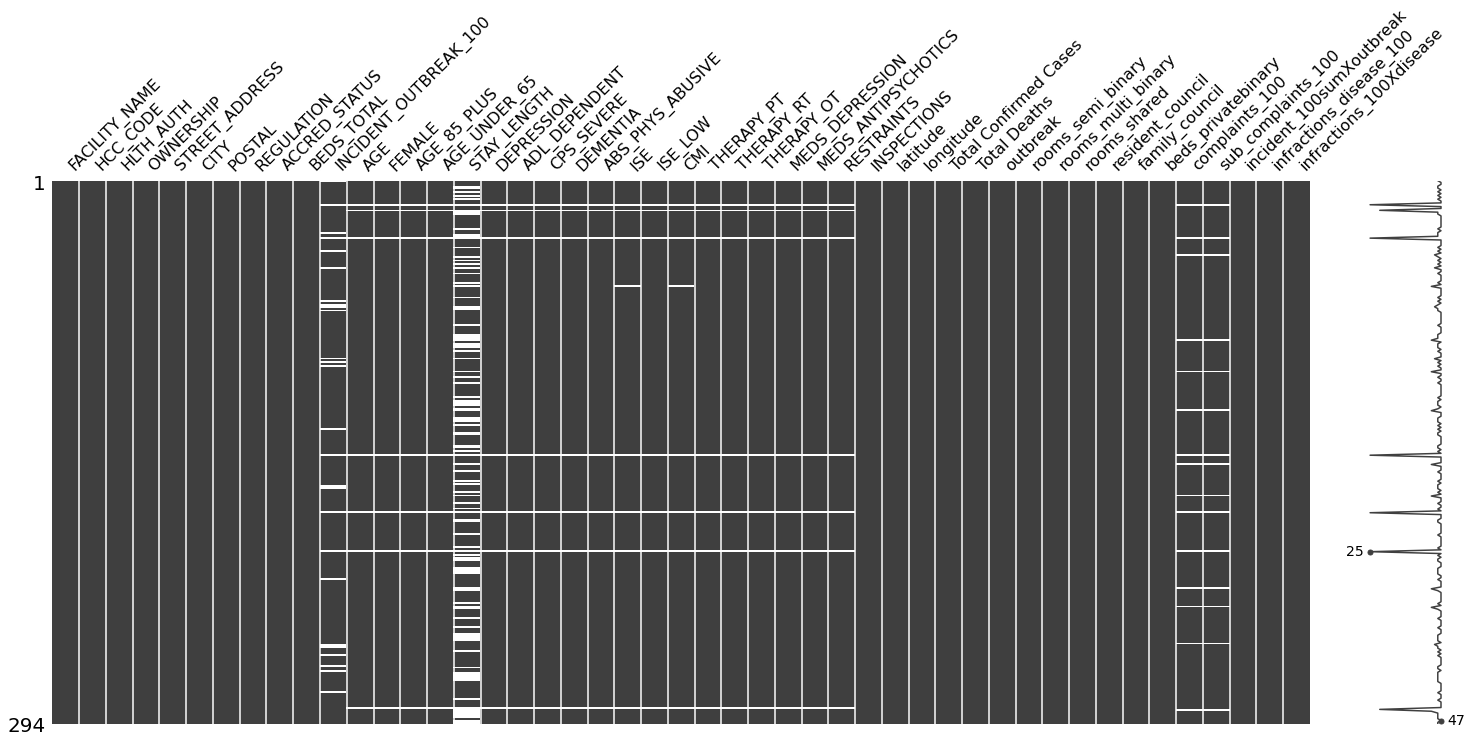

In [18]:
import missingno as msno
msno.matrix(ltc_com)

In [19]:
ltc_com[ltc_com['AGE'].isnull()]


,FACILITY_NAME,HCC_CODE,HLTH_AUTH,OWNERSHIP,STREET_ADDRESS,CITY,POSTAL,REGULATION,ACCRED_STATUS,BEDS_TOTAL,INCIDENT_OUTBREAK_100,AGE,FEMALE,AGE_85_PLUS,AGE_UNDER_65,STAY_LENGTH,DEPRESSION,ADL_DEPENDENT,CPS_SEVERE,DEMENTIA,ABS_PHYS_ABUSIVE,ISE,ISE_LOW,CMI,THERAPY_PT,THERAPY_RT,THERAPY_OT,MEDS_DEPRESSION,MEDS_ANTIPSYCHOTICS,RESTRAINTS,INSPECTIONS,latitude,longitude,Total Confirmed Cases,Total Deaths,outbreak,rooms_semi_binary,rooms_multi_binary,rooms_shared,resident_council,family_council,beds_privatebinary,complaints_100,sub_complaints_100,incident_100sumXoutbreak,infractions_disease_100,infractions_100Xdisease
13,Bella Coola General Hospital,9A8DC,Vancouver Coastal Health,HA,1025 Elcho Street,Bella Coola,V0T1C0,Hospital Act,Accredited,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.374176,-126.757950,0.0,0.0,0,0,0,0,1,1,0,NaN,NaN,0.0,0.0,0.000000
18,Birchview Residences,93GDH,Northern Health,PNP,7780 Hart Highway,Prince George,V2K3B3,Community Care & Assisted Living Act,Not Accredited,21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,53.999924,-122.801100,0.0,0.0,0,1,0,1,0,1,1,0.000000,0.0,23.8,0.0,14.285714
33,Cariboo Place,93GGE,Interior Health,PFP,185 Fourth Ave N,Williams Lake,V2G2C8,Community Care & Assisted Living Act,Accredited,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.131128,-122.141753,0.0,0.0,0,0,0,0,1,1,1,NaN,NaN,0.0,0.0,0.000000
154,Mackenzie and District Hospital and Health Centre,93790,Northern Health,HA,45 Centennial Drive,Mackenzie,V0J2C0,Hospital Act,Accredited,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.337578,-123.100648,0.0,0.0,0,0,0,0,0,0,0,NaN,NaN,0.0,0.0,40.000000
185,Northern Haida Gwaii Hospital and Health Centre,91F3C,Northern Health,HA,2520 Harrison Avenue,Masset,V0T1M0,Hospital Act,Accredited,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.020576,-132.157074,0.0,0.0,0,0,0,0,0,0,0,NaN,NaN,0.0,0.0,160.000000
206,R. W. Large Memorial Hospital,9A773,Vancouver Coastal Health,HA,88 Waglisla Street,Bella Bella,V0T1Z0,Hospital Act,Accredited,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.161211,-128.143320,0.0,0.0,0,0,0,0,0,0,0,NaN,NaN,0.0,0.0,14.285714
291,Woodgrove Manor,91FGB,Vancouver Island Health,PFP,6304 Metral Drive,Nanaimo,V9T2L8,Community Care & Assisted Living Act,Not Accredited,43,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,49.229161,-124.043334,0.0,0.0,0,0,0,0,1,1,1,2.325581,0.0,30.2,0.0,2.325581


In [20]:
# Export the complete dataset
ltc_com.to_csv(r'../data/BC/bc_ltc_complete_sep18.csv', index = False)

# Create selected variables dataset ltc_sel

In [21]:
ltc_sel = ltc_com
ltc_sel = ltc_sel.dropna(axis=1)
ltc_sel.info()
# ltc_sel.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 299
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FACILITY_NAME             294 non-null    object 
 1   HCC_CODE                  294 non-null    object 
 2   HLTH_AUTH                 294 non-null    object 
 3   OWNERSHIP                 294 non-null    object 
 4   STREET_ADDRESS            294 non-null    object 
 5   CITY                      294 non-null    object 
 6   POSTAL                    294 non-null    object 
 7   REGULATION                294 non-null    object 
 8   ACCRED_STATUS             294 non-null    object 
 9   BEDS_TOTAL                294 non-null    int64  
 10  INSPECTIONS               294 non-null    float64
 11  latitude                  294 non-null    float64
 12  longitude                 294 non-null    float64
 13  Total Confirmed Cases     294 non-null    float64
 14  Total Deat

In [ ]:
ltc_sel.columns.values

In [ ]:
# Reorder columns in df
# Remove variables known to be missing (commented out)
# Note that incident data are missing for Hospital Act facilities in VIHA

ltc_sel = ltc_sel[[
        'outbreak',
        'Total Confirmed Cases', 
        'Total Deaths',
        'FACILITY_NAME',
        'HCC_CODE',
        'HLTH_AUTH',
        'OWNERSHIP',
        'STREET_ADDRESS',
        'CITY',
        'POSTAL',
        'REGULATION',
        'ACCRED_STATUS',
        'BEDS_TOTAL',
        'INSPECTIONS',
        'rooms_semi_binary', 
        'rooms_multi_binary', 
        'rooms_shared',
        'resident_council', 
        'family_council', 
        'res_fam_council',
#         'beds_privateprop', 
        'beds_privatebinary', 
#         'incident_100sum',
#         'incident_100sum-outbreak',
#         'incident_100sumXoutbreak'
#         'infractions_100',
        'infractions_disease_100',
        'infractions_100Xdisease',
#         'ownership_HA',
        'latitude',
        'longitude'
]]
ltc_sel.info()
# ltc_sel.head()

In [ ]:
import missingno as msno
msno.matrix(ltc_sel)

In [ ]:
# Export the selected dataset
ltc_sel.to_csv(r'../data/BC/bc_ltc_selected_sep18.csv', index = False)